In [19]:
# For data manipulation
import pandas as pd 
import numpy as np

#For data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')  # Ensures a white background for the plots
sns.set_style("white")

pd.set_option('display.max_columns', None)

#For model Selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Convert categorical variables to dummy variables

from sklearn.preprocessing import OrdinalEncoder

# Importing the metrics & models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score




In [20]:
#import data
df0 = pd.read_csv('/Users/user/Capstone_Project_Salifort_Motors/Files/HR_capstone_dataset.csv')
df0 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
#Having the description of variables in the dataset for better understanding. 
description = pd.read_csv('/Users/user/Capstone_Project_Salifort_Motors/Files/Variable_Description.csv')
description

,Variable,Description
0,satisfaction_level,Employee-reported job satisfaction level [0–1]
1,last_evaluation,Score of employee's last performance review [0–1]
2,number_project,Number of projects employee contributes to
3,average_monthly_hours,Average number of hours employee worked per month
4,time_spend_company,How long the employee has been with the compan...
5,Work_accident,Whether or not the employee experienced an acc...
6,left,Whether or not the employee left the company
7,promotion_last_5years,Whether or not the employee was promoted in th...
8,Department,The employee's department
9,salary,The employee's salary (U.S. dollars)


## Data Overview

- There are **no missing values** in the dataset.  
- Only **department** and **salary** have non-numeric data types.  
- These categorical features **might need to be converted to binary** using **one-hot encoding**  
  if they are used for prediction and the model requires or benefits from numerical input.

In [22]:
#Checking for missing values, and Data types. 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
#Checking for duplicates and removing them.

duplicates = df0.duplicated().sum()
print('number of duplicated rows' ,duplicates) 
df0 = df0.drop_duplicates(keep='first')
df0.info()


number of duplicated rows 3008
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Notes on describe()

- Average monthly hours is very high, it has a **mean** of 201 hours monthly, that means **50 hours a week** which is **20% more than the traditional 40 hour work week** and at the lowest percentile 25% is barely below that number. 

- **Standard deviation** is close to **50 Hours**,  
Are some employees being overworked, burned? compared to other employees and the 40 hour work week traditional in the job market?    

- **Employees spent average of 2 years in the company** Min 1.4 years, max 10 years. the 25% percentile is 3 years. 

**Benchmarking:**

- How does this compare with other companies in the same industry?

- How does this compare based on department? e.g sales roles normally have lower rettention rates compared to other roles. 

- promotion_last_5years has a mean of 0.021, meaning **only 2.1% of employees got a promotion** in the last 5 years, this could contribute to dissatisfaction. 

Cross-checking satisfaction levels vs. attrition could show interesting insight. 



In [24]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Visualizing patterns

## Note! 
There is a noticeable drop at 4 years. Then an huge increase at 5 years.

- What are the posible explanations for this? 

- is this the time where most people are feeling overworked but have not seen a raise?

- is the work-charge/pay balance very high for the employees with less tenure?

- promotion_last_5years has a mean of 0.021, meaning **only 2.1% of employees got a promotion** in the last 5 years, this could contribute to dissatisfaction. 


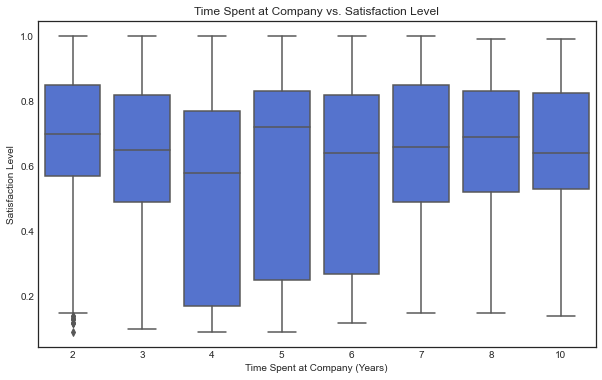

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=df0, color="royalblue")
plt.title('Time Spent at Company vs. Satisfaction Level')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Satisfaction Level')
plt.show()

## Analysis of turnover 



## Note!
In contrast with the chart Employee turnover % by Department, surveys of employee satisfaction **do not** appear to show a noticeable difference across the different departments 

Also there is only a small difference in reported satisfaction between employees who got a promotion and employees who did not. 

**Are employee satisfaction surveys a good measure for satisfaction when it doesn't reflect the differences in turnover rate?**

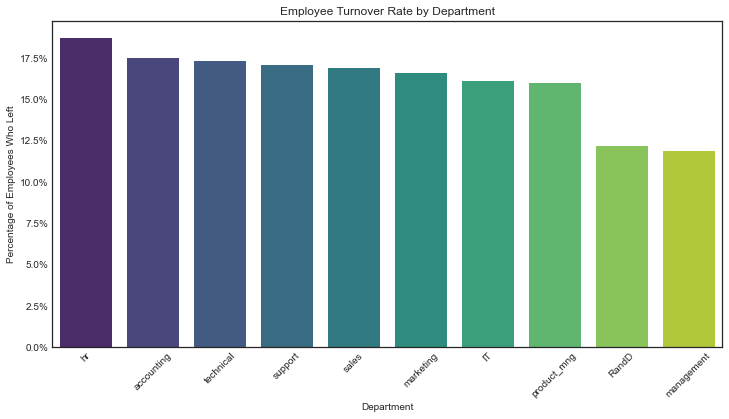

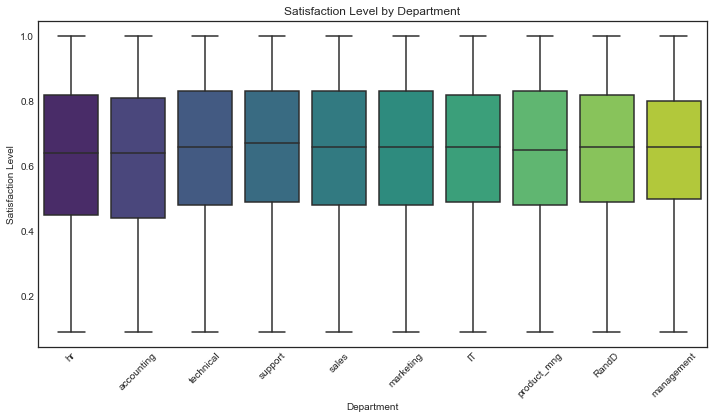

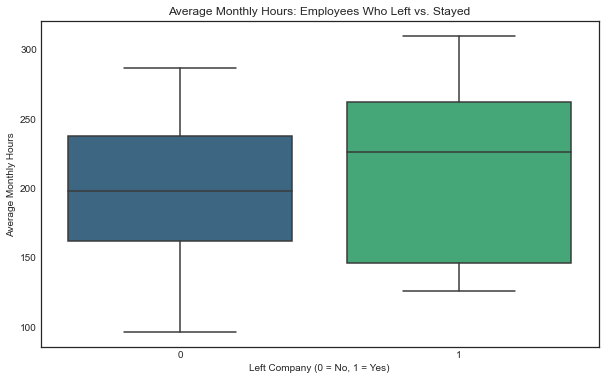

In [26]:
# Calculate percentage of employees who left per department
dept_retention = df0.groupby('Department')['left'].mean().reset_index()

# Sort by highest turnover rate
dept_retention = dept_retention.sort_values(by='left', ascending=False)

# Create a color gradient from red (high turnover) to blue (low turnover)
colors = sns.color_palette("coolwarm", len(dept_retention))
colors.reverse()  # Make highest turnover red and lowest blue

plt.figure(figsize=(12, 6))
sns.barplot(data=dept_retention, x='Department', y='left', palette='viridis')

plt.title('Employee Turnover Rate by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Employees Who Left')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))  # Convert to percentage format
plt.show()


dept_order = dept_retention['Department']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df0, x='Department', y='satisfaction_level', palette='viridis', order=dept_order)

plt.title('Satisfaction Level by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='average_montly_hours', data=df0, palette='viridis')
plt.title('Average Monthly Hours: Employees Who Left vs. Stayed')
plt.xlabel('Left Company (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Hours')
plt.show()

## Promotion Analysis
This chart shows that the promotions variable is unbalanced with only 2,17% of datapoints being promoted in the last 5 years, therefore despite the impresion of showing a correlation between promotions and retention, is **not a good reference for prediction**  

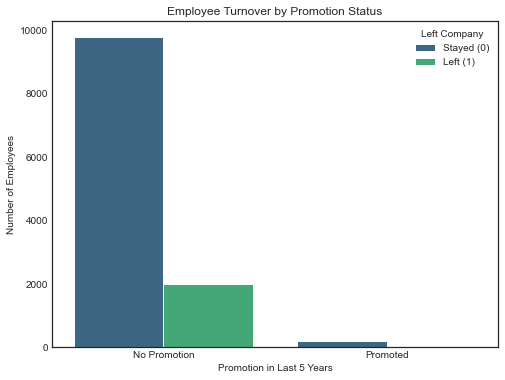

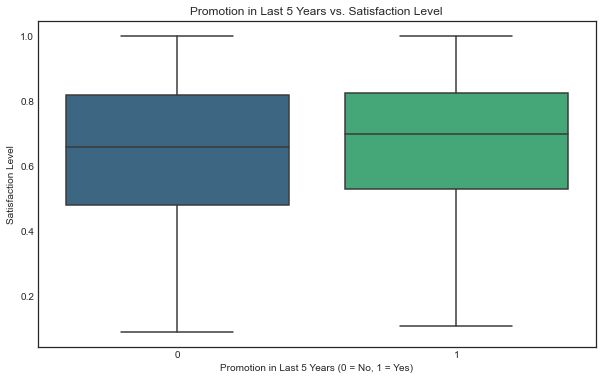

Employee Count by Promotion in Last 5 Years:
0    11788
1      203
Name: promotion_last_5years, dtype: int64 

Percentage of Employees Who Stayed vs. Left:
left                           0          1
promotion_last_5years                      
0                      83.177808  16.822192
1                      96.059113   3.940887


In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df0, x='promotion_last_5years', hue='left', palette='viridis')

plt.title('Employee Turnover by Promotion Status')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promoted'])
plt.legend(title='Left Company', labels=['Stayed (0)', 'Left (1)'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=df0,  palette='viridis')
plt.title('Promotion in Last 5 Years vs. Satisfaction Level')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Satisfaction Level')
plt.show()

# Count of employees in each promotion category
promotion_counts = df0['promotion_last_5years'].value_counts()

# Percentage of employees who stayed vs. left in each category
promotion_left_percent = df0.groupby('promotion_last_5years')['left'].value_counts(normalize=True).unstack() * 100

# Print both
print("Employee Count by Promotion in Last 5 Years:")
print(promotion_counts, "\n")

print("Percentage of Employees Who Stayed vs. Left:")
print(promotion_left_percent)

In [28]:
#Renaming columns to match the course program requirements.
df1 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [29]:
# Count of employees who left vs. stayed
retention_counts = df1['left'].value_counts()

# Convert to percentage
retention_percentages = df1['left'].value_counts(normalize=True) * 100

# Display results
print("Employee Retention Summary:")
print(f"Stayed: {retention_counts[0]} ({retention_percentages[0]:.2f}%)")
print(f"Left: {retention_counts[1]} ({retention_percentages[1]:.2f}%)")

Employee Retention Summary:
Stayed: 10000 (83.40%)
Left: 1991 (16.60%)


## Finding Outliers. 

satisfaction_level: 0 outliers
last_evaluation: 0 outliers
number_project: 0 outliers
average_monthly_hours: 0 outliers
tenure: 824 outliers


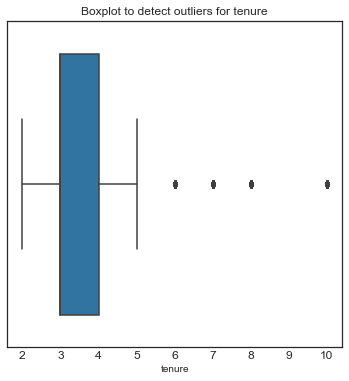

In [30]:
def detect_outliers_iqr(df1):
    outlier_indices = {}
    
    columns_to_check = ['satisfaction_level', 'last_evaluation', 'number_project',
                        'average_monthly_hours', 'tenure']

    for column in columns_to_check: 
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Get indices of outliers
        outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)].index
        outlier_indices[column] = list(outliers)

    return outlier_indices

# Get outliers for the specified columns
outliers_dict = detect_outliers_iqr(df1)

# Print the number of outliers per column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")


plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

## Visualizing Correlations

- **Salary** despite not being a numerical variable, **shows a strong correlation with turnover**. 

- **years in the company:**Between 3 and 5 years, is when most employees leave the company. in percentage, at 4 years is the peak. but this **may be due to different factors that we cannot infer from the data** as it is, therefore **not a good variable to build a predictive model**. 

- **Average monthly hours** and **number of projects** have a strong correlation with satisfaction level but also and logically with each other, **this can be problematic for some type of models** 

- **Satisfaction_level** has the strongest correlation with left, the variable that we want to predict. 

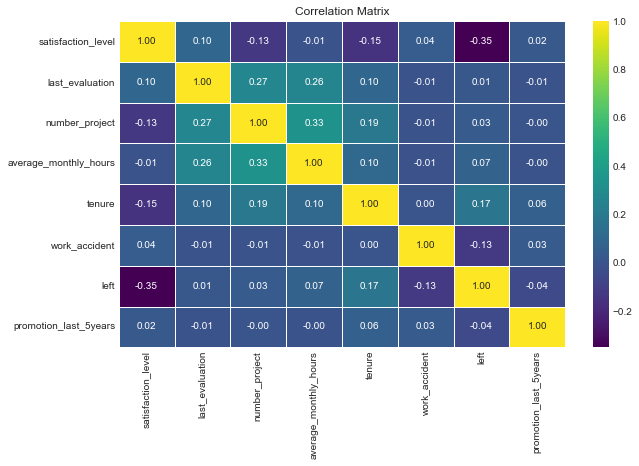

In [31]:
# Compute correlation matrix (excluding categorical variables)
corr_matrix = df1.drop(columns=['department', 'salary']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

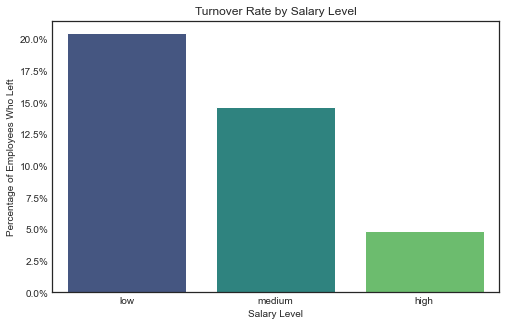

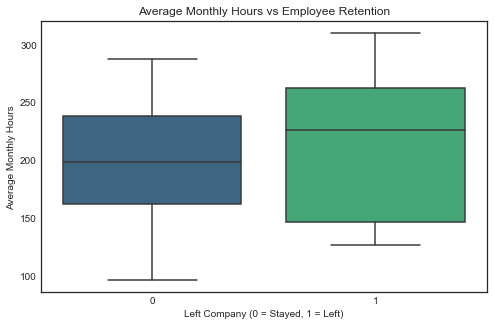

In [32]:
# Calculate turnover percentage by salary
salary_retention = df1.groupby('salary')['left'].mean().reset_index()

# Sort by highest turnover rate
salary_retention = salary_retention.sort_values(by='left', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=salary_retention, x='salary', y='left', palette='viridis')

plt.title('Turnover Rate by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Percentage of Employees Who Left')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))  # Convert to percentage format
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x='left', y='average_monthly_hours', palette='viridis')

plt.title('Average Monthly Hours vs Employee Retention')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Average Monthly Hours')
plt.show()

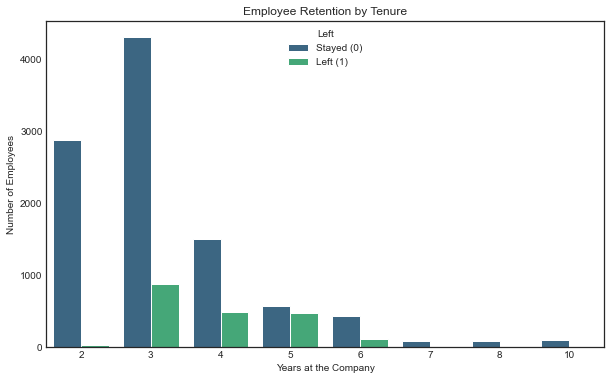

In [33]:
plt.figure(figsize=(10, 6))

# Create grouped bar plot
sns.countplot(data=df1, x='tenure', hue='left', palette='viridis')

# Labels and title
plt.xlabel("Years at the Company")
plt.ylabel("Number of Employees")
plt.title("Employee Retention by Tenure")
plt.legend(title="Left", labels=["Stayed (0)", "Left (1)"])
plt.show()

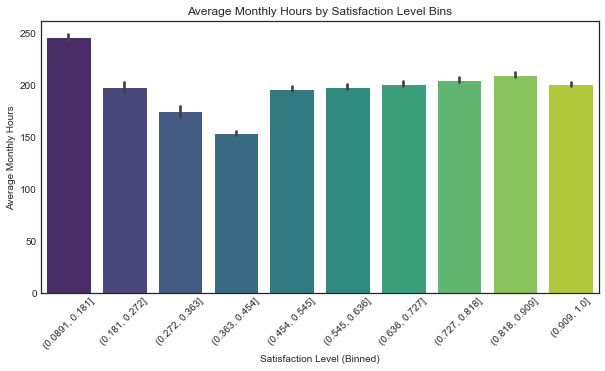

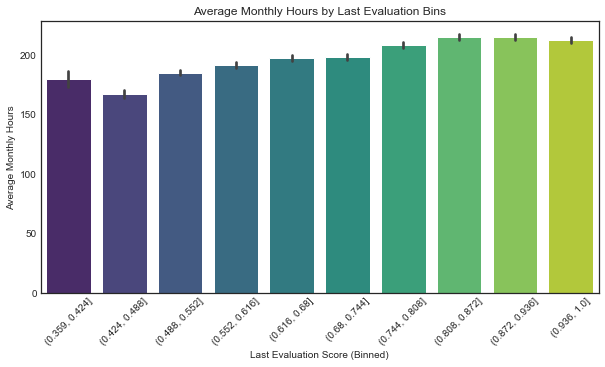

In [34]:
df2 = df1.copy()  # Safe copy for EDA

df2["satisfaction_bin"] = pd.cut(df2["satisfaction_level"], bins=10)  # 10 equal-width bins

plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x="satisfaction_bin", y="average_monthly_hours", estimator=np.mean, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Monthly Hours by Satisfaction Level Bins")
plt.xlabel("Satisfaction Level (Binned)")
plt.ylabel("Average Monthly Hours")
plt.show()

df2["evaluation_bin"] = pd.cut(df2["last_evaluation"], bins=10)  

plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x="evaluation_bin", y="average_monthly_hours", estimator=np.mean, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Monthly Hours by Last Evaluation Bins")
plt.xlabel("Last Evaluation Score (Binned)")
plt.ylabel("Average Monthly Hours")
plt.show()

## Feature Engineering and Variable Selection

### Encoding categorical variables:
- **Department:**  **Target Encoding** fits perfectly here because the churn rate varies significantly across departments, capturing hidden patterns and relationships with the target (left).
Frequency Encoding could be helpful, but since the department distribution is imbalanced, it wouldn’t capture the impact on churn effectively.

- **Salary:** **Ordinal Encoding** 

## Additional Correlation metrics

- **Random Forest Classifier**
- **Pearson's Correlation Matrix**

The results from both methods are consistent. The key drivers of turnover are satisfaction_level, tenure_log, and average_monthly_hours. The low importance of salary and department suggests that internal work dynamics and personal satisfaction play a more significant role in predicting turnover.

	

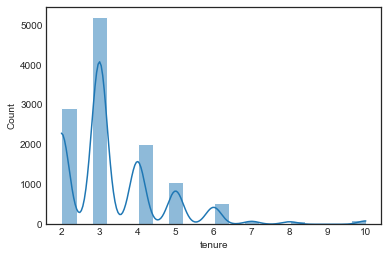

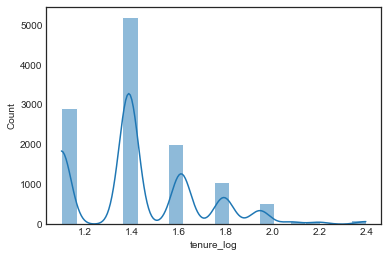

In [35]:
# Plot distribution of tenure, 
sns.histplot(df1['tenure'], bins=20, kde=True)
plt.show()
df1['tenure'].skew()
# log-transformed tenure
df1['tenure_log'] = np.log1p(df1['tenure'])
sns.histplot(df1['tenure_log'], bins=20, kde=True)
plt.show()

In [36]:


# 1. Target Encoding for 'department'
target_mean = df1.groupby('department')['left'].mean()
df1['department_encoded'] = df1['department'].map(target_mean)

# 2. Ordinal Encoding for 'salary'
salary_order = [['low', 'medium', 'high']]
ordinal_encoder = OrdinalEncoder(categories=salary_order)
df1['salary_encoded'] = ordinal_encoder.fit_transform(df1[['salary']])
df1['salary_encoded'] = df1['salary_encoded'].astype(int)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,tenure_log,department_encoded,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.386294,0.169805,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1.945910,0.169805,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1.609438,0.169805,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.791759,0.169805,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.386294,0.169805,0


In [37]:
# Select features for the model
df_selected = df1[['satisfaction_level', 'number_project', 'average_monthly_hours',
                   'tenure_log',  'department_encoded',
                   'salary_encoded', 'left']]
df_selected.head()

,satisfaction_level,number_project,average_monthly_hours,tenure_log,department_encoded,salary_encoded,left
0,0.38,2,157,1.386294,0.169805,0,1
1,0.80,5,262,1.945910,0.169805,1,1
2,0.11,7,272,1.609438,0.169805,1,1
3,0.72,5,223,1.791759,0.169805,0,1
4,0.37,2,159,1.386294,0.169805,0,1


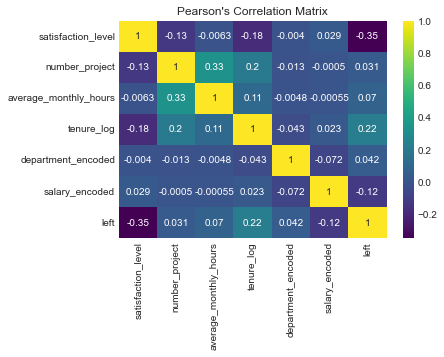

In [38]:
corr_matrix = df_selected.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Pearson's Correlation Matrix")
plt.show()

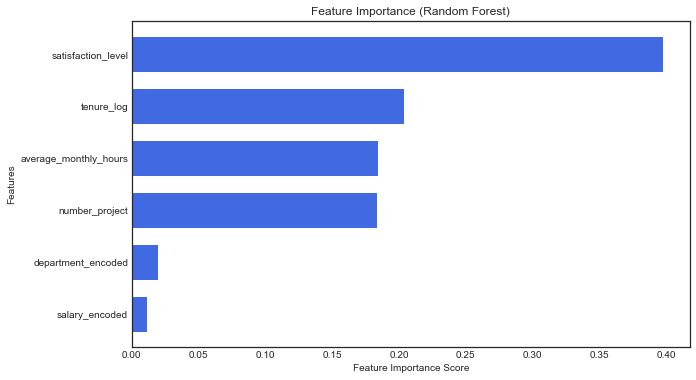

In [39]:

X = df_selected.drop('left', axis=1)
y = df_selected['left']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

plt.figure(figsize=(10, 6))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
sorted_features = feature_importance.sort_values(ascending=True)

plt.barh(sorted_features.index, sorted_features.values, color='royalblue', height=0.7)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()



In [40]:


# Features and target
X = df_selected.drop(columns=['left'])
y = df_selected['left']

# Split the data (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Models 

- **Logistic Regresion:** Very low Precision(0.42) and F1-score(0.56) even afterscaling and increased iterations. suggesting is not the best model for prediction but might have interpretability value if explored further. 

- **Random Forest** Excelent results in all metrics as well as **cross-validation** suggesting:
    - Model is not overfitting.
    - Performs consistently across different subsets of data.
    - There’s no need to further balance the classes.

- **XGBoost:** Similar but slightly better results than Random Forest, as well as similar feature importance results. 

In [41]:

# Define the pipeline with scaling and logistic regression (with class balancing)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('log_reg', LogisticRegression(class_weight='balanced', random_state=42, max_iter=500))  # Step 2: Train Logistic Regression
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)  
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'AUC: {auc:.3f}')

Accuracy: 0.784
Precision: 0.424
Recall: 0.849
F1-score: 0.566
AUC: 0.840


In [43]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # For AUC

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f'\nRandom Forest Results:')
print(f'Accuracy: {accuracy_rf:.3f}')
print(f'Precision: {precision_rf:.3f}')
print(f'Recall: {recall_rf:.3f}')
print(f'F1-score: {f1_rf:.3f}')
print(f'AUC: {auc_rf:.3f}')


Random Forest Results:
Accuracy: 0.985
Precision: 0.976
Recall: 0.930
F1-score: 0.952
AUC: 0.979


In [44]:
# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')

# Print results
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean AUC: {cv_scores.mean():.3f}")

Cross-Validation AUC Scores: [0.9808366  0.97662911 0.97004029 0.98147897 0.9794219 ]
Mean AUC: 0.978


In [45]:
from xgboost import XGBClassifier

# Initialize XGBoost model with recommended settings
xgb = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42, 
    use_label_encoder=False,  # Avoid deprecation warning
    eval_metric="logloss"  # Restore default behavior from pre-1.3 versions
)

# Train the model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Evaluate
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC: {roc_auc_score(y_test, y_prob_xgb):.3f}")

/Users/user/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoost Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

AUC: 0.985


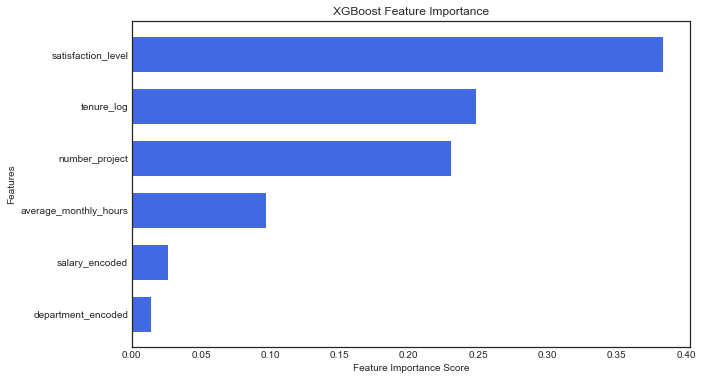

In [46]:
# Get feature importance from trained XGBoost model
xgb_importance = xgb.feature_importances_

# Convert to a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_importance})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='royalblue', height=0.7)  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()


In [69]:
import joblib

# Save models
joblib.dump(rf, "random_forest_model.pkl")  # Random Forest model
joblib.dump(xgb, "xgboost_model.pkl")  # XGBoost model

['xgboost_model.pkl']